# Climate Data Analysis
this document has code that handles the climate data analysis and makes the plots. a lot of this data is exported to csvs to be used in other notebooks to compare w/ CDOM or Kd490

In [2]:
#numeric python module, useful for handling large data arrays
import numpy as np

import pandas as pd

#module for dealing with netCDF files (all sat files are netCDF)
import netCDF4 as nc

#modules for making plots. Here wer are importing the full matplotlib
#module, but also the sub-module pyplot separately with an abbreviated
#name so it is easier to use in the code
import matplotlib.pyplot as plt
import matplotlib

#panda
import pandas as pd


#import datetime
import datetime
from datetime import datetime

#for displaying the plots in this notebook 
%matplotlib inline

#module for making maps
from mpl_toolkits.basemap import Basemap

#miscellaneous operating system interfaces module for doing things like
#moving file, exploring directory paths, etc..
import os
import re


In [3]:
##THIS IS FOR THE CLIMATE DATA
#specify the directory where all the files are saved
clim_dir= '/Users/clarabirdferrer/Documents/Bigelow/Data/climate'


wd = os.chdir(clim_dir)
cwd = os.getcwd()
print (cwd)

/Users/clarabirdferrer/Documents/Bigelow/Data/climate


In [4]:
from pandas import DatetimeIndex


##import txt file
fn= 'NCD_PRCP.csv'
data = np.genfromtxt(fn,delimiter=',')
#print(data)


##convert all -9999 cdom data points into nan
prcp = data[:,1]
prcp[prcp < -9000] = np.nan
print(prcp)


##convert date to actual date
date = data[:,0]
#print(date)
date = list(date)
dt = pd.to_datetime(date,format='%Y%m%d')
#print(dt)

##combine dates and prcp
d = {'B':prcp,'A':dt}
df = pd.DataFrame(data=d)
#print(df)


#take monthly averages and put in list
na = df.dropna(axis=0,how='any')
#print(na)                                         ###still have 2 columns here
#print(na.dtypes)

b = na.resample('1M',how='mean',on='A')              ##calculates mean #go down to one column here
#print(len(b.columns))
c = na.resample('1M',how='std',on='A')    ##calculates standard dev
e = na.resample('1M',how='var',on='A')    ##calculates variance?? I hope

a = b.dropna(axis=0,how='any') #means w/o nan
#print(a.shape)
#print(a)
d = c.dropna(axis=0,how='any') #standard dev w/o nan

f = e.dropna(axis=0,how='any') #variance w/o nan


#save a to txt file which turns out to just hold means and the standard dev
datafile = '/Users/clarabirdferrer/Documents/Bigelow/Data/climate/prcp_means.txt'
np.savetxt(datafile,a,fmt='%.6f')

datafile = '/Users/clarabirdferrer/Documents/Bigelow/Data/climate/prcp_std.txt'
np.savetxt(datafile,d,fmt='%.6f')

datafile = '/Users/clarabirdferrer/Documents/Bigelow/Data/climate/prcp_var.txt'
np.savetxt(datafile,f,fmt='%.6f')


[ nan  5.5  5.4 ...,  nan  nan  nan]


/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:34: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:36: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).std()
/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:37: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).var()


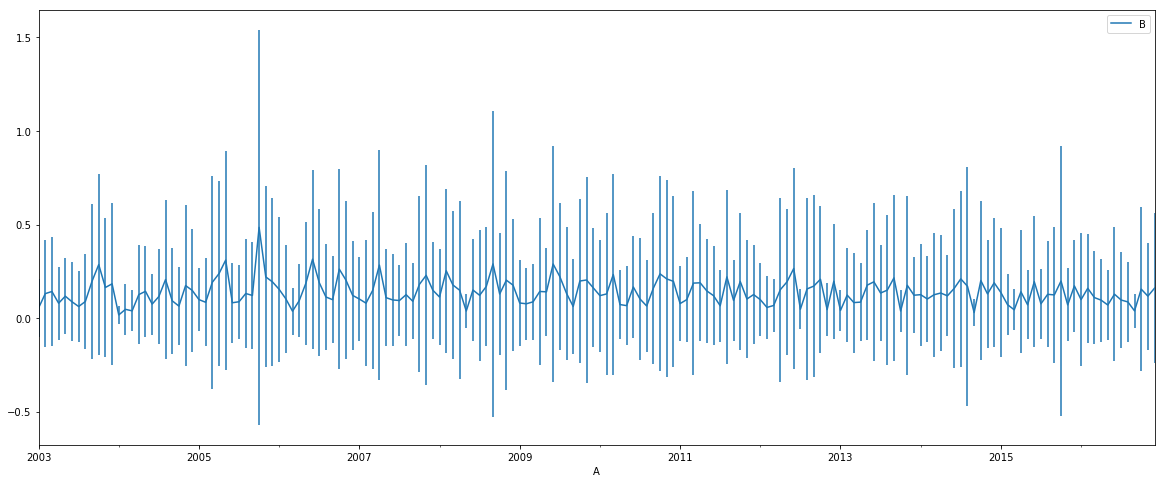

In [5]:
a.plot(figsize=(20,8),yerr=d)

#saving the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/prcp_timeseries'
plt.savefig(filename1+'.tif',dpi=300)

In [1]:
##this cell finds all the 2005 prcp values, takes the daily means and plots them
prcp = na
date = prcp['A']
prcp = prcp['B']
d = {'A':date,'B':prcp}
df = pd.DataFrame(data = d)
df = df.sort_values(['A'])
#df
#print(date)
year = []
extra = []
for i in date:
    y = str(i)
    yy = y[:4]
    #print(yy)
    if yy == '2005':
        year += [y]
    else:
        extra += [y]

#print(year)
dfprcp = df.loc[df['A'].isin(year)]
#print(dfprcp)
df_prcp = dfprcp.groupby('A',as_index=False)['B'].mean()
#print(df_prcp)

fig1 = plt.figure(figsize=(20,8))
plt.plot(df_prcp['A'],df_prcp['B'])

NameError: name 'na' is not defined

In [9]:
#this is saving file to csv but we only want some of the columns
#this is the prcp2005 csv because its easier to plot some things in excel
header = ["A","B"]
df_prcp.to_csv('prcp2005.csv',columns=header)

In [10]:
prcp_jan = []
prcp_feb = []
prcp_mar = []
prcp_apr = []
prcp_may = []
prcp_jun = []
prcp_jul = []
prcp_aug = []
prcp_sep = []
prcp_oct = []
prcp_nov = []
prcp_dec = []

for (i,ii) in zip(dfprcp['A'],dfprcp['B']):
        iii = str(i)
        yr = iii[:4]
        #print(yr)
        m = iii[:7]
        mn = m[5:]
        day = iii[8:]
        day = day[:2]
        #print(day)
        time = str(mn) + '_' + str(yr)
        date = datetime.strptime(time,'%m_%Y')
        #print (mn)
        prcp = ii
        if mn == '10':
            prcp_oct += [prcp]
        elif mn == '11':
            prcp_nov += [prcp]
        elif mn == '12':
            prcp_dec += [prcp]
        elif mn == '01':
            prcp_jan += [prcp]
        elif mn == '02':
            prcp_feb += [prcp]
        elif mn == '03':
            prcp_mar += [prcp]
        elif mn == '04':
            prcp_apr += [prcp]
        elif mn == '05':
            prcp_may += [prcp]
        elif mn == '06':
            prcp_jun += [prcp]
        elif mn == '07':
            prcp_jul += [prcp]
        elif mn == '08':
            prcp_aug += [prcp]
        elif mn == '09':
            prcp_sep += [prcp]
            
prcp_avgs = []
prcp_stds = []

jan_avg = np.nanmean(prcp_jan)
jan_stddev = np.nanstd (prcp_jan)
prcp_avgs += [jan_avg]
prcp_stds += [jan_stddev]

feb_avg = np.nanmean(prcp_feb)
feb_stddev = np.nanstd (prcp_feb)
prcp_avgs += [feb_avg]
prcp_stds += [feb_stddev]

mar_avg = np.nanmean(prcp_mar)
mar_stddev = np.nanstd (prcp_mar)
prcp_avgs += [mar_avg]
prcp_stds += [mar_stddev]

apr_avg = np.nanmean(prcp_apr)
apr_stddev = np.nanstd(prcp_apr)
prcp_avgs += [apr_avg]
prcp_stds += [apr_stddev]

may_avg = np.nanmean(prcp_may)
may_stddev = np.nanstd(prcp_may)
prcp_avgs += [may_avg]
prcp_stds += [may_stddev]

jun_avg = np.nanmean(prcp_jun)
jun_stddev = np.nanstd(prcp_jun)
prcp_avgs += [jun_avg]
prcp_stds += [jun_stddev]

jul_avg = np.nanmean(prcp_jul)
jul_stddev = np.nanstd(prcp_jul)
prcp_avgs += [jul_avg]
prcp_stds += [jul_stddev]

aug_avg = np.nanmean(prcp_aug)
aug_stddev = np.nanstd(prcp_aug)
prcp_avgs += [aug_avg]
prcp_stds += [aug_stddev]

sep_avg = np.nanmean(prcp_sep)
sep_stddev = np.nanstd(prcp_sep)
prcp_avgs += [sep_avg]
prcp_stds += [sep_stddev]

oct_avg = np.nanmean(prcp_oct)
oct_stddev = np.nanstd(prcp_oct)
prcp_avgs += [oct_avg]
prcp_stds += [oct_stddev]

nov_avg = np.nanmean(prcp_nov)
nov_stddev = np.nanstd(prcp_nov)
prcp_avgs += [nov_avg]
prcp_stds += [nov_stddev]

dec_avg = np.nanmean(prcp_dec)
dec_stddev = np.nanstd(prcp_dec)
prcp_avgs += [dec_avg]
prcp_stds += [dec_stddev]

print(prcp_avgs)

[0.098924731182795711, 0.084683544303797487, 0.19149425287356323, 0.2377906976744186, 0.31010752688172039, 0.082111111111111121, 0.087526881720430119, 0.1313978494623656, 0.12122222222222222, 0.48505376344086021, 0.22022222222222224, 0.19355555555555554]


In [11]:
import datetime
from datetime import datetime
#monthly anomalies of prcp
prcp = na
date = prcp['A']
prcp = prcp['B']

#what time is
prcp_jan = []
prcp_feb = []
prcp_mar = []
prcp_apr = []
prcp_may = []
prcp_jun = []
prcp_jul = []
prcp_aug = []
prcp_sep = []
prcp_oct = []
prcp_nov = []
prcp_dec = []
prcp_dates = []
prcp_years = []
prcp_mn = []

for (i,ii) in zip(date,prcp):
        iii = str(i)
        yr = iii[:4]
        #print(yr)
        m = iii[:7]
        mn = m[5:]
        day = iii[8:]
        day = day[:2]
        #print(day)
        time = str(mn) + '_' + str(yr)
        date = datetime.strptime(time,'%m_%Y')
        #print (mn)
        prcp = ii
        if mn == '10':
            prcp_oct += [prcp]
        elif mn == '11':
            prcp_nov += [prcp]
        elif mn == '12':
            prcp_dec += [prcp]
        elif mn == '01':
            prcp_jan += [prcp]
        elif mn == '02':
            prcp_feb += [prcp]
        elif mn == '03':
            prcp_mar += [prcp]
        elif mn == '04':
            prcp_apr += [prcp]
        elif mn == '05':
            prcp_may += [prcp]
        elif mn == '06':
            prcp_jun += [prcp]
        elif mn == '07':
            prcp_jul += [prcp]
        elif mn == '08':
            prcp_aug += [prcp]
        elif mn == '09':
            prcp_sep += [prcp]
        da = int(day)
        if da == 20:
            prcp_dates += [date]
            if mn == '12':
                prcp_years += [yr]
                if yr == '2016':
                    break
        if yr == '2015':
            if da == 20:
                prcp_mn += [mn]
#print(prcp_dates)
#print(prcp_years)
#print(prcp_jan)
#print(hi)
#print(prcp_mn)

In [12]:
#calculate averages for each month
prcp_avgs = []
prcp_stds = []

jan_avg = np.nanmean(prcp_jan)
jan_stddev = np.nanstd (prcp_jan)
prcp_avgs += [jan_avg]
prcp_stds += [jan_stddev]

feb_avg = np.nanmean(prcp_feb)
feb_stddev = np.nanstd (prcp_feb)
prcp_avgs += [feb_avg]
prcp_stds += [feb_stddev]

mar_avg = np.nanmean(prcp_mar)
mar_stddev = np.nanstd (prcp_mar)
prcp_avgs += [mar_avg]
prcp_stds += [mar_stddev]

apr_avg = np.nanmean(prcp_apr)
apr_stddev = np.nanstd(prcp_apr)
prcp_avgs += [apr_avg]
prcp_stds += [apr_stddev]

may_avg = np.nanmean(prcp_may)
may_stddev = np.nanstd(prcp_may)
prcp_avgs += [may_avg]
prcp_stds += [may_stddev]

jun_avg = np.nanmean(prcp_jun)
jun_stddev = np.nanstd(prcp_jun)
prcp_avgs += [jun_avg]
prcp_stds += [jun_stddev]

jul_avg = np.nanmean(prcp_jul)
jul_stddev = np.nanstd(prcp_jul)
prcp_avgs += [jul_avg]
prcp_stds += [jul_stddev]

aug_avg = np.nanmean(prcp_aug)
aug_stddev = np.nanstd(prcp_aug)
prcp_avgs += [aug_avg]
prcp_stds += [aug_stddev]

sep_avg = np.nanmean(prcp_sep)
sep_stddev = np.nanstd(prcp_sep)
prcp_avgs += [sep_avg]
prcp_stds += [sep_stddev]

oct_avg = np.nanmean(prcp_oct)
oct_stddev = np.nanstd(prcp_oct)
prcp_avgs += [oct_avg]
prcp_stds += [oct_stddev]

nov_avg = np.nanmean(prcp_nov)
nov_stddev = np.nanstd(prcp_nov)
prcp_avgs += [nov_avg]
prcp_stds += [nov_stddev]

dec_avg = np.nanmean(prcp_dec)
dec_stddev = np.nanstd(prcp_dec)
prcp_avgs += [dec_avg]
prcp_stds += [dec_stddev]

print(prcp_avgs)
print(prcp_stds)

[0.16052186177715094, 0.19078864353312303, 0.21077683615819212, 0.23676966292134824, 0.21338770388958597, 0.2546746347941567, 0.19178873239436617, 0.23276150627615064, 0.22487062404870622, 0.32865951742627347, 0.27160458452722064, 0.25186440677966104]
[0.30555068765060112, 0.35384504815592538, 0.43718842454882267, 0.44762382980829551, 0.34769405853876695, 0.43950132505125872, 0.34951118443056317, 0.45031235435192207, 0.48500657310589834, 0.62361251837953025, 0.53677937348188132, 0.39441973601666919]


## Sea Surface Temperature

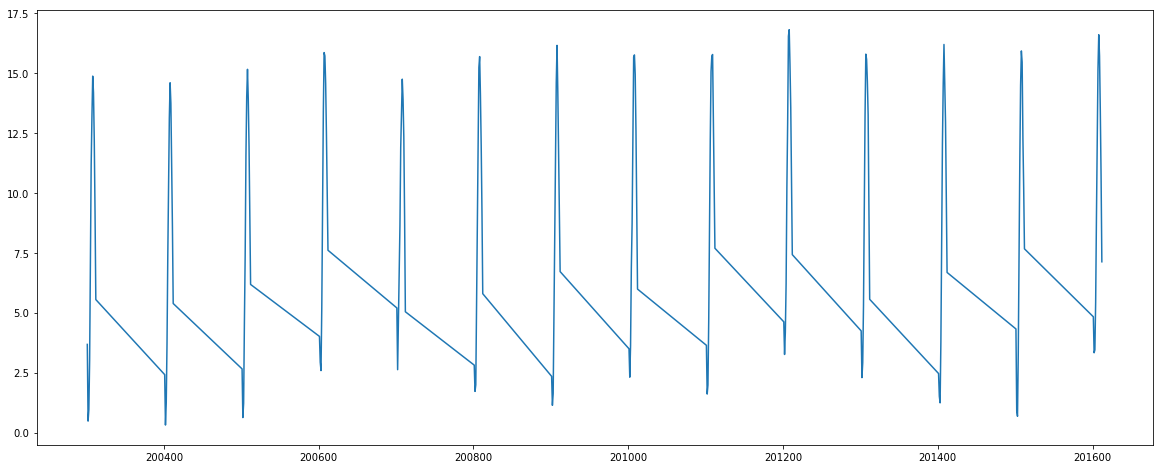

In [15]:
from pandas import DatetimeIndex

path = '/Users/clarabirdferrer/Documents/Bigelow/Data/climate/'
df_sst = pd.read_csv(path+"NCD_SST.csv",sep=',',header=(0))
Date = []
sst = []
for i in df_sst['date']:
    yr = i[:4]
    mo = i[:7]
    mn = mo[5:]
    date = yr + '_'+ mn
    Date += [date]

df_sst['Date'] = Date
#print(df_sst)
df_sstmean = df_sst.groupby('Date',as_index=False)['SST'].mean()

header = ['Date','SST']
df_sstmean.to_csv('sst_means.csv',columns=header)

fig1 = plt.figure(figsize=(20,8))
plt.plot(df_sstmean['Date'],df_sstmean[['SST']])

R2= 0.100102230465
m= -0.00700691529736
p= 0.270431754058


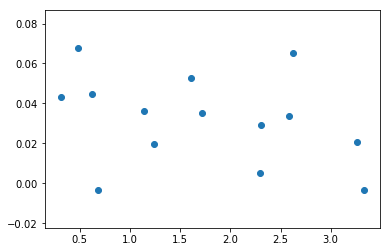

In [16]:
path = '/Users/clarabirdferrer/Documents/Bigelow/Data/climate/'
df = pd.read_csv(path+'cdomdiff_sstmin.csv',sep=',',header=(0))

import scipy
from scipy import stats
x = df['SSTmin']
y = df['cdomdiff']
slope,intercept,r_value,p_value,std_err = scipy.stats.linregress(x,y)
r_squared = r_value**2
print('R2=', r_squared)
print('m=', slope)
print('p=',p_value)

plt.scatter(x,y)

### WIND

In [17]:
### WIND ANALYSIS


from pandas import DatetimeIndex


##import txt file
fn= 'NCD_WIND.csv'
data = np.genfromtxt(fn,delimiter=',')
#print(data)


##convert all -9999 cdom data points into nan
prcp = data[:,1]
prcp[prcp < -9000] = 0
print(prcp)


##convert date to actual date
date = data[:,0]
#print(date)
date = list(date)
dt = pd.to_datetime(date,format='%Y%m%d')
#print(dt)

##combine dates and prcp
d = {'B':prcp,'A':dt}
df = pd.DataFrame(data=d)
#print(df)


#take monthly averages and put in list
na = df.dropna(axis=0,how='any')
#print(na)                                         ###still have 2 columns here
#print(na.dtypes)

b = na.resample('1M',how='mean',on='A')              ##calculates mean #go down to one column here
#print(len(b.columns))
c = na.resample('1M',how='std',on='A')    ##calculates standard dev

a = b.dropna(axis=0,how='any') #means w/o nan
#print(a.dtypes)
#print(a)
d = c.dropna(axis=0,how='any') #standard dev w/o nan

#save a to txt file which turns out to just hold means and the standard dev
datafile = '/Users/clarabirdferrer/Documents/Bigelow/Data/climate/wind_means.txt'
np.savetxt(datafile,a,fmt='%.6f')

datafile = '/Users/clarabirdferrer/Documents/Bigelow/Data/climate/wind_std.txt'
np.savetxt(datafile,d,fmt='%.6f')


[ nan   0.   0. ...,   0.   0.   0.]


/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:37: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).std()


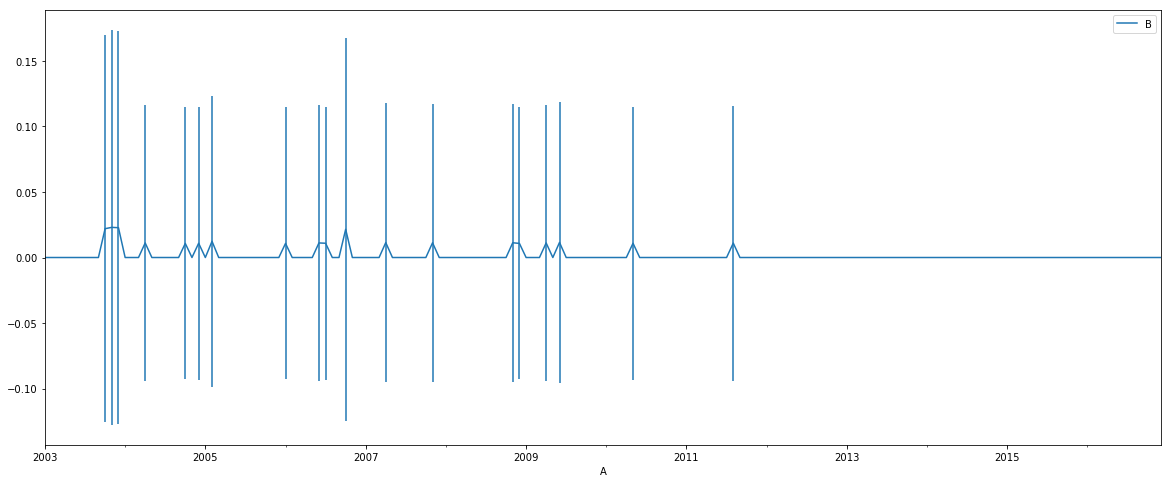

In [18]:
a.plot(figsize=(20,8),yerr=d)

#saving the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/wind_timeseries'
plt.savefig(filename1+'.tif',dpi=300)